In [1]:
%matplotlib notebook

Matplotlib is building the font cache; this may take a moment.


In [2]:
import matplotlib as mpl
mpl.get_backend()

'nbAgg'

Matplotlib es una biblioteca de visualización de datos para el lenguaje de programación Python. Su arquitectura se basa en una estructura modular que permite crear gráficos 
de alta calidad de manera flexible y personalizable. A grandes rasgos,  la arquitectura de Matplotlib se puede dividir en tres partes principales:

Capa de backend:

Esta capa se encarga de la interacción directa con el sistema de ventanas y la representación gráfica de los elementos. Hay varios backends disponibles,
 como Tkinter, GTK, Qt, etc. Cada backend se encarga de generar la salida gráfica en un formato específico, ya sea una ventana emergente, un archivo de imagen, etc.
Capa de artistas:

Esta capa define la estructura y el diseño de los elementos gráficos individuales, como figuras, ejes, líneas, texto, etc. Cada elemento gráfico se representa 
como un "artista" y se pueden manipular independientemente para personalizar la apariencia del gráfico.
Capa de scripting:

Esta capa proporciona una interfaz de alto nivel para crear y personalizar gráficos de manera fácil y rápida. Los usuarios interactúan con esta capa a través de
 un conjunto de funciones y métodos que les permiten especificar los datos a visualizar, el tipo de gráfico, los estilos y otras propiedades.

#### Backend Layer:
At the bottom of the stack is the backend layer, which provides concrete implementations of the abstract interface classes:

FigureCanvas encapsulates the concept of a surface to draw onto (e.g. "the paper").
Renderer does the drawing (e.g. "the paintbrush").
Event handles user inputs such as keyboard and mouse events.


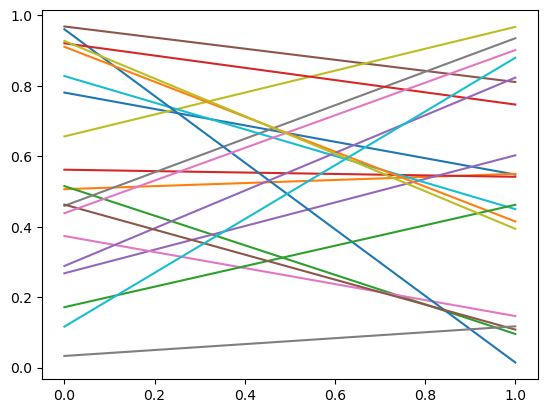

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def on_press(event):
    if event.inaxes is None: return
    for line in event.inaxes.lines:
        if event.key=='t':
            visible = line.get_visible()
            line.set_visible(not visible)
    event.inaxes.figure.canvas.draw()

fig, ax = plt.subplots(1)

fig.canvas.mpl_connect('key_press_event', on_press)

ax.plot(np.random.rand(2, 20))

plt.show()

Over time, the drawing API of the output backends grew a large number of methods, including:

draw_arc, draw_image, draw_line_collection, draw_line, draw_lines, draw_point,
draw_quad_mesh, draw_polygon_collection, draw_polygon, draw_rectangle,
draw_regpoly_collection

The number of required methods in the backend API was reduced considerably, to only:

draw_path: Draws compound polygons, made up of line and Béezier segments. This interfaces replaces many of the old methods: draw_arc, draw_line, draw_lines, and draw_rectangle.
draw_image: Draws raster images.
draw_text: Draws text with the given font properties.
get_text_width_height_descent: Given a string of text, return its metrics.


The full list of optional backend API methods is:

draw_markers: Draws a set of markers.
draw_path_collection: Draws a collection of paths.
draw_quad_mesh: Draws a quadrilateral mesh.

#### Artist Layer:

The Artist hierarchy is the middle layer of the matplotlib stack, and is the place where much of the heavy lifting happens. Continuing with the analogy that the FigureCanvas from the backend is the paper, the Artist is the object that knows how to take the Renderer (the paintbrush) and put ink on the canvas. Everything you see in a matplotlib Figure is an Artist instance; the title, the lines, the tick labels, the images, and so on all correspond to individual Artist instances (see Figure 11.3). The base class is matplotlib.artist.Artist, which contains attributes that every Artist shares: the transformation which translates the artist coordinate system to the canvas coordinate system (discussed in more detail below), the visibility, the clip box which defines the region the artist can paint into, the label, and the interface to handle user interaction such as "picking"; that is, detecting when a mouse click happens over the artist.

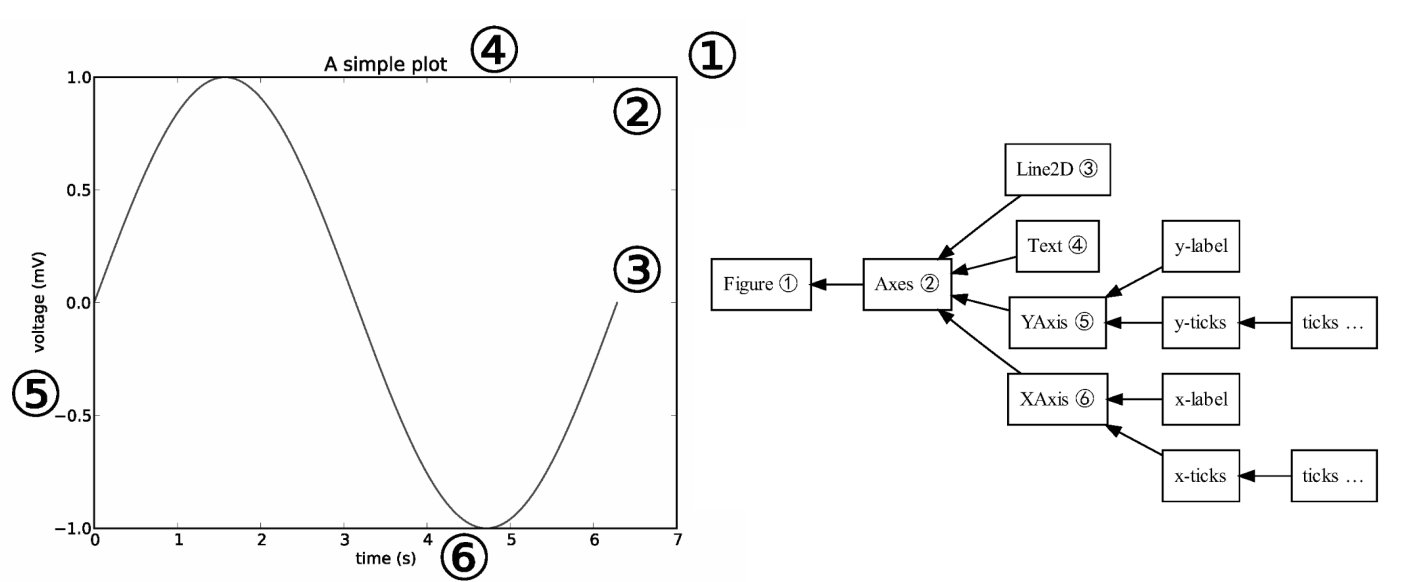

#### Scripting Layer (pyplot):


The script using the API above works very well, especially for programmers, and is usually the appropriate programming paradigm when writing a web application server, a UI application, or perhaps a script to be shared with other developers. For everyday purposes, particularly for interactive exploratory work by bench scientists who are not professional programmers, it is a bit syntactically heavy. Most special-purpose languages for data analysis and visualization provide a lighter scripting interface to simplify common tasks, and matplotlib does so as well in its matplotlib.pyplot interface. The same code above, using pyplot, reads


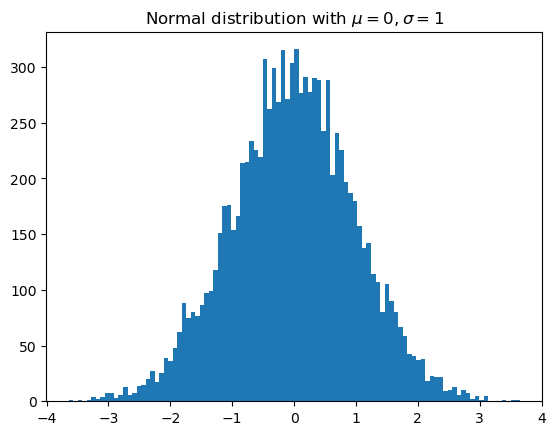

In [2]:
import matplotlib.pyplot as plt
import numpy as np

x = np.random.randn(10000)
plt.hist(x, 100)
plt.title(r'Normal distribution with $\mu=0, \sigma=1$')
plt.savefig('matplotlib_histogram.png')
plt.show()

Let's dissect the important lines in the script to see how this internal state is managed.

import matplotlib.pyplot as plt: When the pyplot module is loaded, it parses a local configuration file in which the user states, among many other things, their preference for a default backend. This might be a user interface backend like QtAgg, in which case the script above will import the GUI framework and launch a Qt window with the plot embedded, or it might be a pure image backend like Agg, in which case the script will generate the hard-copy output and exit.
plt.hist(x, 100): This is the first plotting command in the script. pyplot will check its internal data structures to see if there is a current Figure instance. If so, it will extract the current Axes and direct plotting to the Axes.hist API call. In this case there is none, so it will create a Figure and Axes, set these as current, and direct the plotting to Axes.hist.
plt.title(r'Normal distribution with $\mu=0, \sigma=1$'): As above, pyplot will look to see if there is a current Figure and Axes. Finding that there is, it will not create new instances but will direct the call to the existing Axes instance method Axes.set_title.
plt.show(): This will force the Figure to render, and if the user has indicated a default GUI backend in their configuration file, will start the GUI mainloop and raise any figures created to the screen.

#### Transforms

The full list of optional backend API methods is:

draw_markers: Draws a set of markers.
draw_path_collection: Draws a collection of paths.
draw_quad_mesh: Draws a quadrilateral mesh.

Transform nodes may be either simple affine transformations and non-affine transformations. Affine transformations are the family of transformations that preserve straight lines and ratios of distances, including rotation, translation, scale and skew. Two-dimensional affine transformations are represented using a 3×3 affine transformation matrix. The transformed point (x', y') is obtained by matrix-multiplying the original point (x, y) by this matrix:



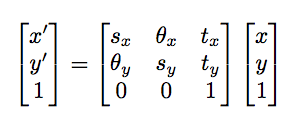